Numerical Methods RK 

# Explicite euler

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numerik_functions as nf

EXP: Schrittweite:  0.10526315789473684


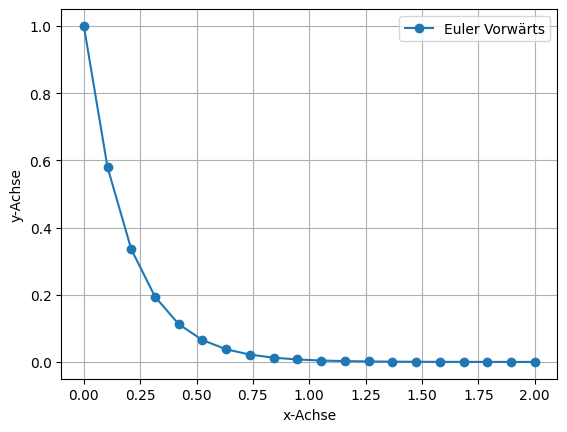

In [23]:
def RK_explizit(x0, X, N, f):
    h = (X-x0[0])/(N-1)
    print("EXP: Schrittweite: ", h)

    x = np.zeros((N))
    y = np.zeros((N))
    x[0] = x0[0]
    y[0] = x0[1]

    for i in range(1, N):
        x[i] = x[i-1] + h
        k = f(x[i-1], y[i-1])
        y[i] = y[i-1] + h*k

    return x, y

def model1(x, y):
    return -4 * y

x0 = [0, 1] # Startwert x, y
res_x, res_y = RK_explizit(x0, 2, 20, model1)

plt.plot(res_x, res_y, 'o-', label='Euler Vorwärts')
plt.ylabel('y-Achse')
plt.xlabel('x-Achse')
plt.legend()
plt.grid(True)
plt.show()

# Euler implizit nach Pseudocode auf Seite 48/49

EXP: Schrittweite:  0.4
IMP: Schrittweite:  0.4
EXP: Schrittweite:  0.2
IMP: Schrittweite:  0.2
EXP: Schrittweite:  0.04
IMP: Schrittweite:  0.04


<Figure size 640x480 with 0 Axes>

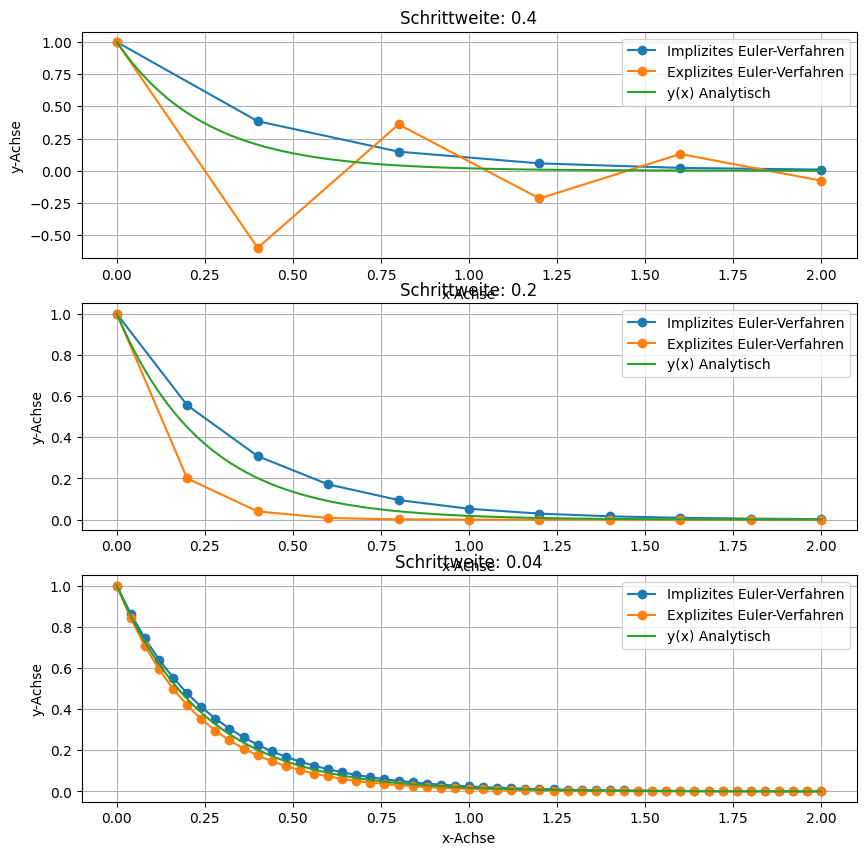

In [26]:
def RK_implizit(x0, X, N, f, df, tol):
    # x0: Startpunkt
    # X: Endpunkt
    # f: Funktion
    # df: Jacobi Matrix der Funktion f
    # N: Anzahl der Schritte
    # tol: Toleranz
    max_iter=20

    h= (X-x0[0])/(N-1)
    print( "IMP: Schrittweite: ", h)
    x = np.zeros(N)
    y = np.zeros(N)
    x[0] = x0[0]
    y[0] = x0[1]

    #Anfangspunkt berechnen
    k = f(x[0],y[0])

    for i in range(1,N):
        step = 0
        x[i] = x[i-1] + h
        r = k - f(x[i-1] + h, y[i-1] + (h*k))

        while np.abs(r) > tol and step < max_iter:
            j = df(x[i-1] + h, y[i-1] + (h*k))
            delta_k = -r / (1 - (h*j))
            k = k + delta_k
            r = k - f(x[i-1] + h, y[i-1] + (h*k))
            step += 1

        y[i] = y[i-1] + (h*k)

    return x,y

def model2(x,y):
    return -4*y

def model2_df(x,y):
    #return 16*y
    return -4

def model_analytisch(x):
    return np.exp(-4 * x)


x0 = (0, 1)
x_exp, y_exp = RK_explizit(x0, 2, 6, model1)
x_imp,y_imp = RK_implizit(x0, 2, 6, model2, model2_df ,1e-3)

x_exp2, y_exp2 = RK_explizit(x0, 2, 11, model1)
x_imp2,y_imp2 = RK_implizit(x0, 2, 11, model2, model2_df ,1e-3)

x_exp3, y_exp3 = RK_explizit(x0, 2, 51, model1)
x_imp3,y_imp3 = RK_implizit(x0, 2, 51, model2, model2_df ,1e-3)


x_an = np.linspace(0,2,100)
plt.figure(1)
plt.figure(figsize=(10,10))
plt.subplot(311)
plt.plot(x_imp, y_imp, 'o-', label='Implizites Euler-Verfahren')
plt.plot(x_exp, y_exp, 'o-', label='Explizites Euler-Verfahren')
plt.plot(x_an, model_analytisch(x_an), '-', label='y(x) Analytisch')
plt.ylabel('y-Achse')
plt.xlabel('x-Achse')
plt.title('Schrittweite: 0.4')
plt.legend()
plt.grid(True)
plt.subplot(312)
plt.plot(x_imp2, y_imp2, 'o-', label='Implizites Euler-Verfahren')
plt.plot(x_exp2, y_exp2, 'o-', label='Explizites Euler-Verfahren')
plt.plot(x_an, model_analytisch(x_an), '-', label='y(x) Analytisch')
plt.ylabel('y-Achse')
plt.xlabel('x-Achse')
plt.title('Schrittweite: 0.2')
plt.legend()
plt.grid(True)
plt.subplot(313)
plt.plot(x_imp3, y_imp3, 'o-', label='Implizites Euler-Verfahren')
plt.plot(x_exp3, y_exp3, 'o-', label='Explizites Euler-Verfahren')
plt.plot(x_an, model_analytisch(x_an), '-', label='y(x) Analytisch')
plt.ylabel('y-Achse')
plt.xlabel('x-Achse')
plt.title('Schrittweite: 0.04')
plt.legend()
plt.grid(True)
plt.show()

# Euler implizite

Implizite => Steigung ist nicht als Funktion gegeben sondern wird Implizit über die Gleichung definiert

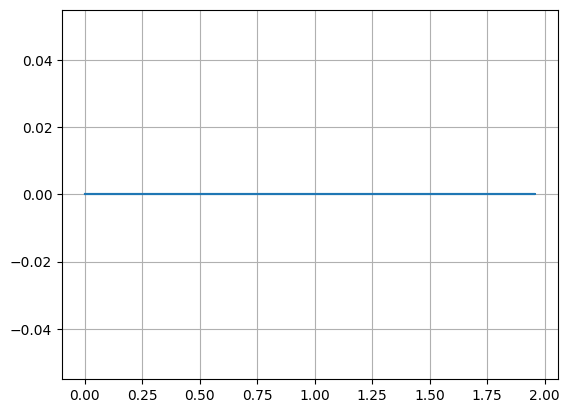

In [5]:
def newton_implizitEuler(xend,x0,y0,n,tol):
    
    h= (xend-x0)/n
    def f (x,y):
        return -4*y
    def df(x,y):
        return -4

    x = np.zeros(n)
    y = np.zeros(n)
    k=f(x0,y0)

    for i in range(1,n-1):
        x[i]= x[i-1]+h
        r = k-f(x[i-1]+h,y[i-1]+h*k)

        while np.abs(r) > tol:
            j = df(x[i-1]+h,y[i-1]+h*k)
            delta_k = -r/(1-h*j)
            k = k+delta_k
            r = k-f(x[i-1]+h,y[i-1]+h*k)

        y[i]=y[i-1]+h*k

    return x,y

x,y = newton_implizitEuler(2,0,1,100,1e-6)
plt.plot(x,y)
plt.grid()
plt.show()

# Konvergenz Ordnung

EXP: Schrittweite:  2.0
EXP: Schrittweite:  1.0
EXP: Schrittweite:  0.6666666666666666
EXP: Schrittweite:  0.5
EXP: Schrittweite:  0.4
EXP: Schrittweite:  0.3333333333333333
EXP: Schrittweite:  0.2857142857142857
EXP: Schrittweite:  0.25
EXP: Schrittweite:  0.2222222222222222
EXP: Schrittweite:  0.2
EXP: Schrittweite:  0.18181818181818182
EXP: Schrittweite:  0.16666666666666666
EXP: Schrittweite:  0.15384615384615385
EXP: Schrittweite:  0.14285714285714285
EXP: Schrittweite:  0.13333333333333333
EXP: Schrittweite:  0.125
EXP: Schrittweite:  0.11764705882352941
EXP: Schrittweite:  0.1111111111111111
EXP: Schrittweite:  0.10526315789473684
EXP: Schrittweite:  0.1
EXP: Schrittweite:  0.09523809523809523
EXP: Schrittweite:  0.09090909090909091
EXP: Schrittweite:  0.08695652173913043
EXP: Schrittweite:  0.08333333333333333
EXP: Schrittweite:  0.08
EXP: Schrittweite:  0.07692307692307693
EXP: Schrittweite:  0.07407407407407407
EXP: Schrittweite:  0.07142857142857142
EXP: Schrittweite:  0.068

<Figure size 640x480 with 0 Axes>

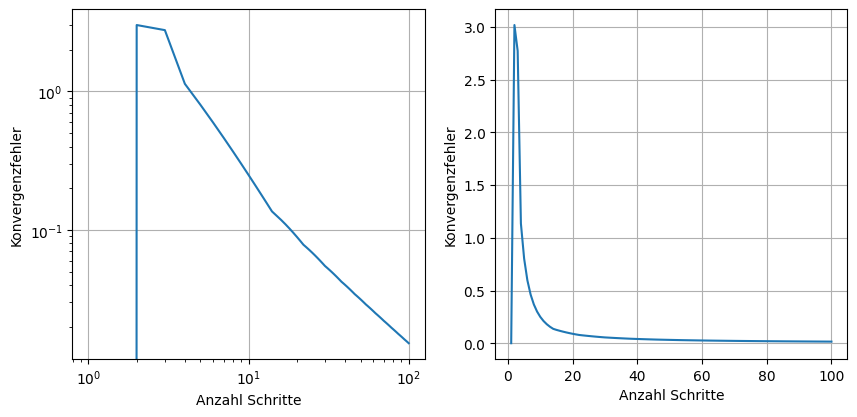

In [11]:
n_vec = list(range(1, 101)) # Vektor [1,2,...,100]
err = []
for n in n_vec:
    #print("Schritt:" ,n)
    x, y = RK_explizit(x0, 2, n, model1)
    err.append(np.linalg.norm(y-model_analytisch(x),np.inf)) # ya(x) ist die exakte Lösung

err_steps = True
if(err_steps == True):
    plt.figure(2)
    plt.figure(figsize=(10,10))
    plt.subplot(221)
    plt.loglog(n_vec,err,'-')
    plt.xlabel('Anzahl Schritte')
    plt.ylabel('Konvergenzfehler')
    plt.grid()
    plt.subplot(222)
    plt.plot(n_vec,err,'-')
    plt.xlabel('Anzahl Schritte')
    plt.ylabel('Konvergenzfehler')
    plt.grid()
    plt.show()

### 6. Anfangswertproblem für $y'(x) + x^2 / y(x) = 0$\ lösen 

EXP: Schrittweite:  0.02
IMP: Schrittweite:  0.020202020202020204


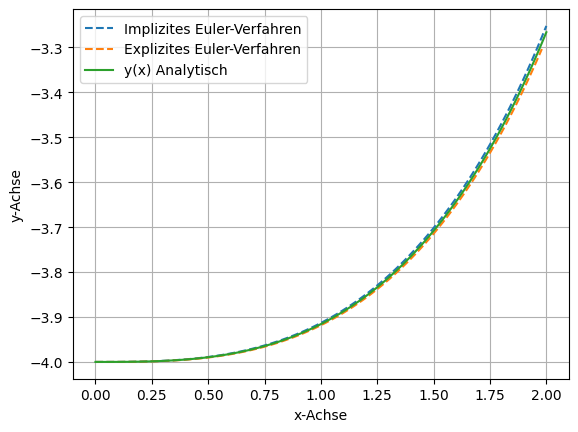

In [13]:
def model3(x,y):
    return -(x**2)/(y)

def model3_df(x,y):
    return (x**2)/(y**2)

def model3_analytisch(tdata):
    return -np.sqrt(2/3) * np.sqrt(24 - tdata**3)

x0 = (0, -4)
x_exp, y_exp = RK_explizit(x0, 2, 100, model3)
x_imp,y_imp = RK_implizit(x0, 2, model3, model3_df ,100 ,1e-3)


x_an = np.linspace(0,2,100)
plt.figure(1)
plt.plot(x_imp, y_imp, '--', label='Implizites Euler-Verfahren')
plt.plot(x_exp, y_exp, '--', label='Explizites Euler-Verfahren')
plt.plot(x_an, model3_analytisch(x_an), '-', label='y(x) Analytisch')
plt.ylabel('y-Achse')
plt.xlabel('x-Achse')
plt.legend()
plt.grid(True)
plt.show()

# Richtungsfeld

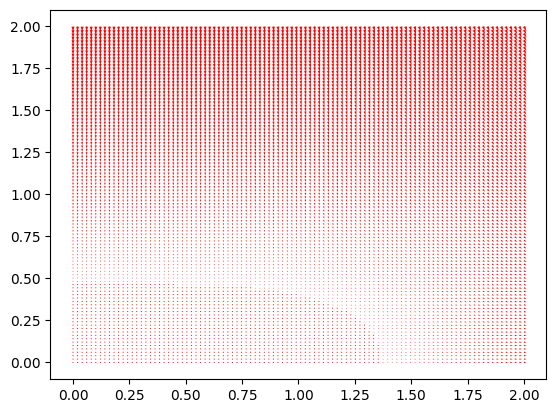

In [10]:
# Field of direction

x,y = np.meshgrid(np.linspace(0,2,100),np.linspace(0,2,100))
#x,y=np.meshgrid(x_exp,y_exp)
U = np.ones((100, 100))
plt.quiver(x,y, x*x_exp,y*y_exp, color='r')
plt.show()

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_11768\1546012083.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.quiver(x,y,1,-x**2/(y))
C:\Users\Jonathan\AppData\Local\Temp\ipykernel_11768\1546012083.py:5: RuntimeWarning: invalid value encountered in divide
  plt.quiver(x,y,1,-x**2/(y))


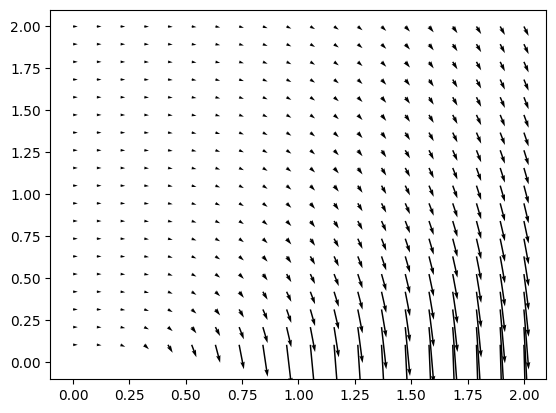

In [35]:
# Field of direction

x,y=np.meshgrid(np.linspace(0,2,20),np.linspace(0,2,20))
plt.quiver(x,y,1,-x**2/(y))
plt.show()